**Part 1: Model Training and Saving** (Using Google Colab)

Step 1: Set Up Google Colab

- Open Google Colab.

- Import necessary libraries (PyTorch, torchvision, etc.).

- Mount Google Drive if you want to save the model directly to your drive.

Step 2: Load and Preprocess Dataset

- Download the garbage classification dataset from Kaggle.

- Preprocess the data (resizing, normalization, etc.).

- Split the dataset into training and testing sets.

Step 3: Model Training

- Load a pre-trained CNN (like ResNet) from torchvision.models.

- Modify the classifier layer to suit your number of classes.

- Train the model on your dataset.

- Evaluate the model on the test set.

Step 4: Save the Trained Model

- Use torch.save to save the trained model.

- You can save it to Google Drive for easy access.

In [ ]:
#Step 1: Set Up Google Colab
# Import necessary libraries
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mount Google Drive (Optional)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import shutil
import random

# Define the path to the parent folder containing class subfolders
original_data_path = '/content/drive/My Drive/garbage classification/'


Garbage classification refers to the separation of several types of different categories in accordance with the environmental impact of the use of the value of the composition of garbage components and the requirements of existing treatment methods.

 Garbage Classification Data The Garbage Classification Dataset contains 6 classifications: cardboard (393), glass (491), metal (400), paper(584), plastic (472) and trash(127).

In [ ]:
# Check directory contents
os.listdir(original_data_path)

['Garbage classification', 'test', 'train']

In [ ]:
train_data_path = f'{original_data_path}train'
test_data_path = f'{original_data_path}test'

In [ ]:
os.listdir(train_data_path)

['trash', 'plastic', 'paper', 'metal', 'glass', 'cardboard']

In [ ]:
os.listdir(test_data_path)

['paper', 'glass', 'metal', 'plastic', 'cardboard', 'trash']

In [ ]:
#Step 2: Load and Preprocess Dataset
# Data Transformations
# Dataset Download and Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),        # Resize images
    transforms.ToTensor(),                # Convert images to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])


# Load Dataset
# Use the ImageFolder dataset class to load data directly from folders
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
#Step 3: Model Training
# Load a pre-trained model (ResNet in this case)
model = torchvision.models.resnet50(pretrained=True)

# Modify the classifier
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))  # Adjust the number of classes

# Move model to the appropriate device
model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 7  # You can adjust this
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))

#Step 4: Save the Trained Model
# Save the trained model
model_path = '/content/drive/My Drive/garbage_model.pkl'  # Change this to your desired path
torch.save(model.state_dict(), model_path)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 109MB/s]


Epoch [1/7], Loss: 1.1587
Epoch [2/7], Loss: 1.2125
Epoch [3/7], Loss: 2.5115
Epoch [4/7], Loss: 0.5568
Epoch [5/7], Loss: 0.4303
Epoch [6/7], Loss: 1.8821
Epoch [7/7], Loss: 1.7325
Test Accuracy of the model on the test images: 73.72372372372372 %


**Part 2: API Creation with FastAPI (Using PyCharm)**

Step 1: Set Up Your Python Environment in PyCharm

- Create a new Python project in PyCharm.

- Install FastAPI and Uvicorn for running the API.

Step 2: Create FastAPI Application

- Create a new Python file for your FastAPI application.
- Load the trained model (use torch.load).
- Define an endpoint that receives an image and returns the classification.

Step 3: Running the API
- Run your FastAPI application using Uvicorn.

Step 1: Set Up Your Python Environment in PyCharm

- Open PyCharm and create a new project named GarbageClassificationAPI.

- Open the terminal in PyCharm (usually at the bottom).

- Install FastAPI and Uvicorn by running:

pip install fastapi[all] uvicorn

- Create a directory named model where you will store your trained model file (e.g., garbage_model.pkl).

You can create a directory (folder) in PyCharm by following these steps:

- Open your project in PyCharm.

- In the Project  on the left side of the PyCharm window, right-click on the location where you want to create the new directory (e.g., the top-level project directory).

- Select "New" from the context menu.

- Choose "Directory" from the submenu.

- A new directory will appear in the Project Explorer, and you can give it a name. For example, you can name it "model" in your case.

- Press Enter or click outside the directory name field to confirm the name.

Now, you have created a directory named "model" within your PyCharm project where you can store your trained model file and any other related files. You can save your garbage_model.pkl file in this directory once it's ready.

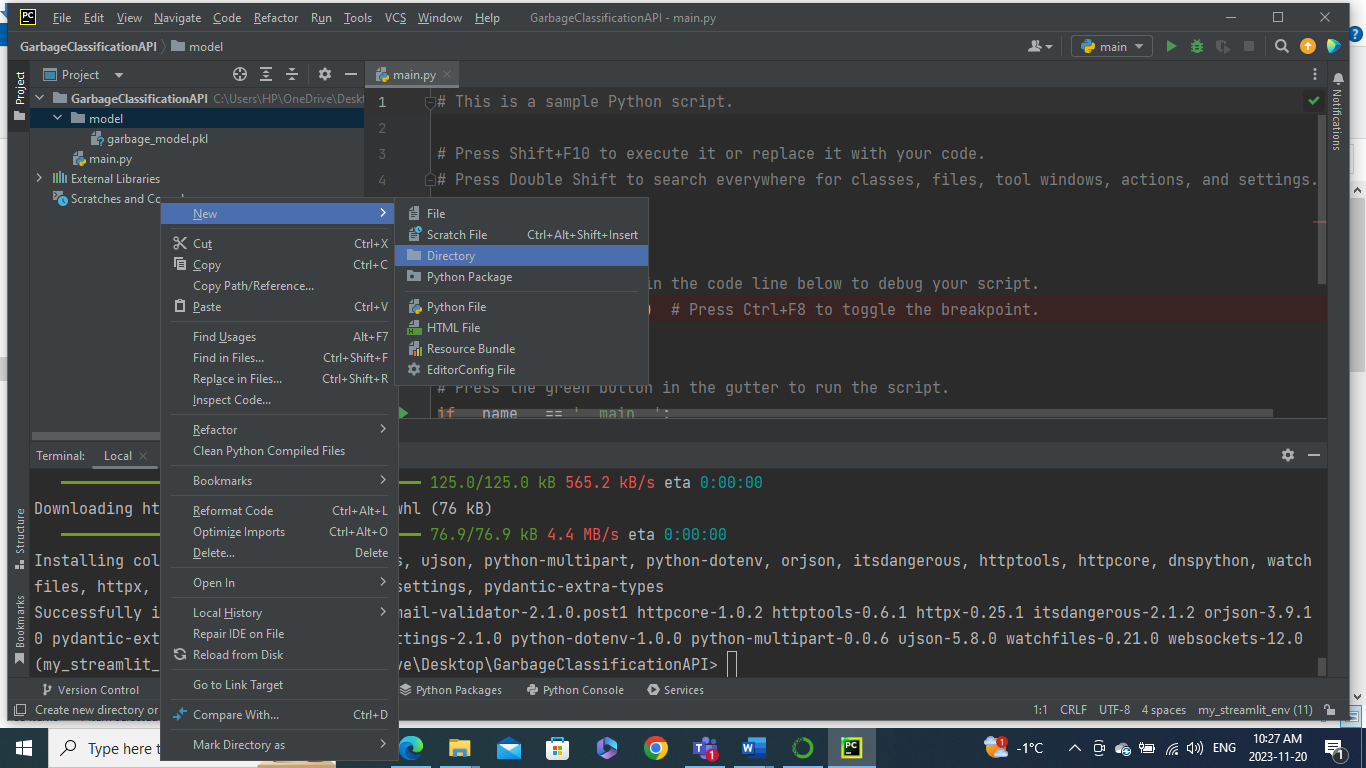

Step 2: Create FastAPI Application

In the main project directory (GarbageClassificationAPI), create a new Python file named main.py


Write the following code in main.py :

In [ ]:
#structure model
/GarbageClassificationAPI
    /model
        - garbage_model.pkl  # Your trained model file
    - main.py               # FastAPI application
    - streamlit_app.py      # Streamlit application


In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import torch
from torchvision import models, transforms
from PIL import Image
import io

app = FastAPI()



# Load the trained model
model_path = './model/garbage_model.pkl'  # Adjust the path to where you stored your model
model = models.resnet50()  # Initialize the model architecture (same as trained model)

# Modify the classifier to match the training architecture
num_features = model.fc.in_features
num_classes = 6  # Replace with the actual number of classes in your dataset
model.fc = torch.nn.Linear(num_features, num_classes)

model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()



# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

@app.post("/classify")
async def classify_image(file: UploadFile = File(...)):
    image_data = await file.read()
    image = Image.open(io.BytesIO(image_data))
    image = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # Assuming you have a list of class names
    #class_names = ["class1", "class2", "class3", ...]  # Replace with your actual class names ["trash", "plastic", "paper", "metal", "glass", "cardboard"]
    class_names = ["trash", "plastic", "paper", "metal", "glass", "cardboard"]
    response = class_names[predicted.item()]

    return JSONResponse(content={"classification": response})



**Note**

Make sure the model architecture in main.py matches the one you trained.

Update the class_names list with the actual class names of your dataset.

The @app.post("/classify") endpoint is set up to receive an image file, classify it, and return the predicted class.

The torch.load function is set to load the model on the CPU. If you have a GPU-enabled environment and want to use it, you can remove map_location=torch.device('cpu').

Step 3: Running the API

In the PyCharm terminal, run your FastAPI application:

**uvicorn main:app --reload**

This will start the server and you can access your API at http://127.0.0.1:8000.
To test, use the /classify endpoint to send an image and get a classification response.

Start the FastAPI Server:

Open your terminal or command prompt.
Navigate to the directory where your FastAPI application (e.g., main.py) is located.

Run the FastAPI application using Uvicorn with the following command:

uvicorn main:app --reload


The --reload flag enables auto-reloading of the server when you make changes to your code.

Accessing the FastAPI Application:

Once the server is running, it will provide a URL, typically http://127.0.0.1:8000.

Open this URL in your web browser. You should see FastAPI's default homepage, which indicates that your API is running.

Interacting with the API:

FastAPI generates an interactive API documentation using Swagger UI, accessible at http://127.0.0.1:8000/docs.

Go to this URL, and you'll see your /classify endpoint listed.

You can interact with the /classify endpoint directly from this documentation page. It allows you to upload an image and see the classification result returned by your model.

Testing the API:

Use the Swagger UI to upload an image and test your classification endpoint.
Click on the /classify endpoint in the documentation, then click "Try it out".

Upload an image file and click "Execute". The API should process the image and return the classification result in JSON format.

Result:

If everything works correctly, after uploading an image and clicking "Execute", you'll receive a response below with the classification result. It'll be in the format: {"classification": "class_name"} where class_name is one of the classes like "trash", "plastic", etc.

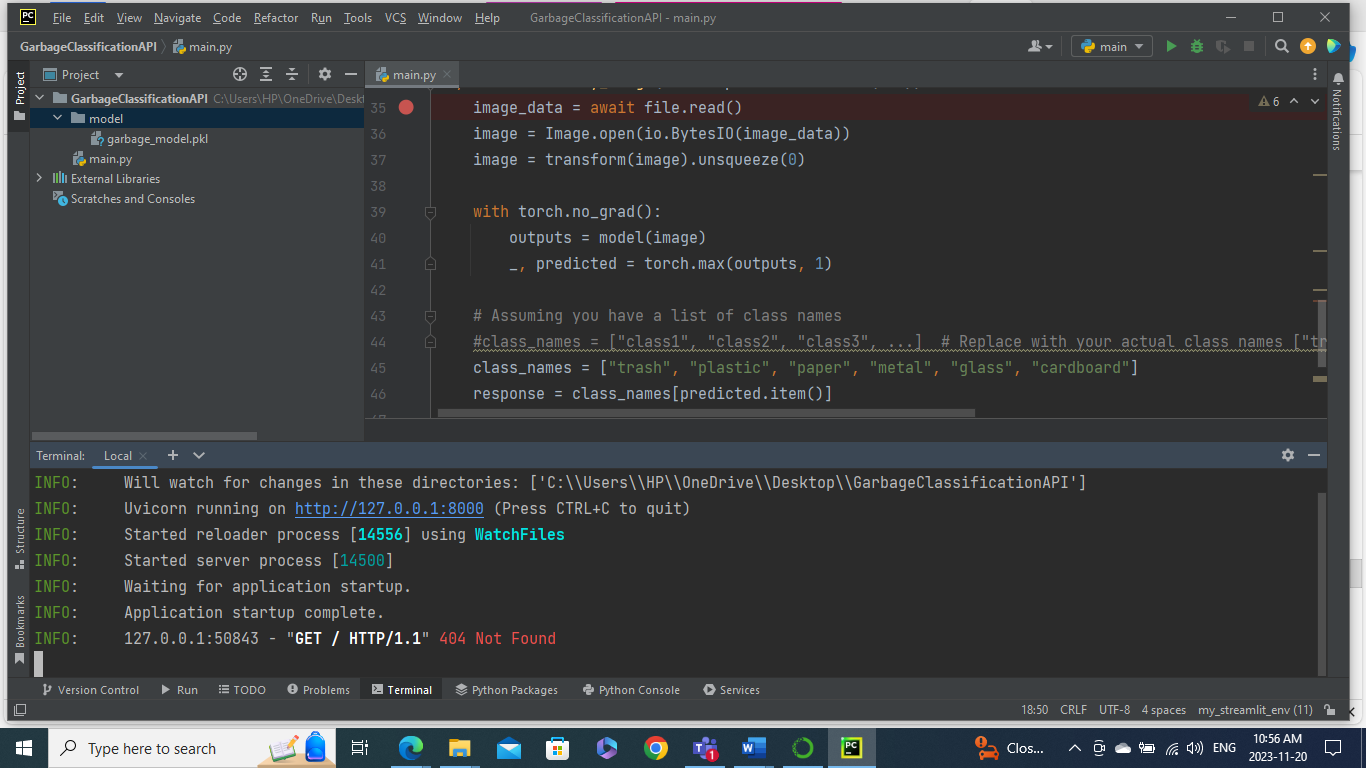

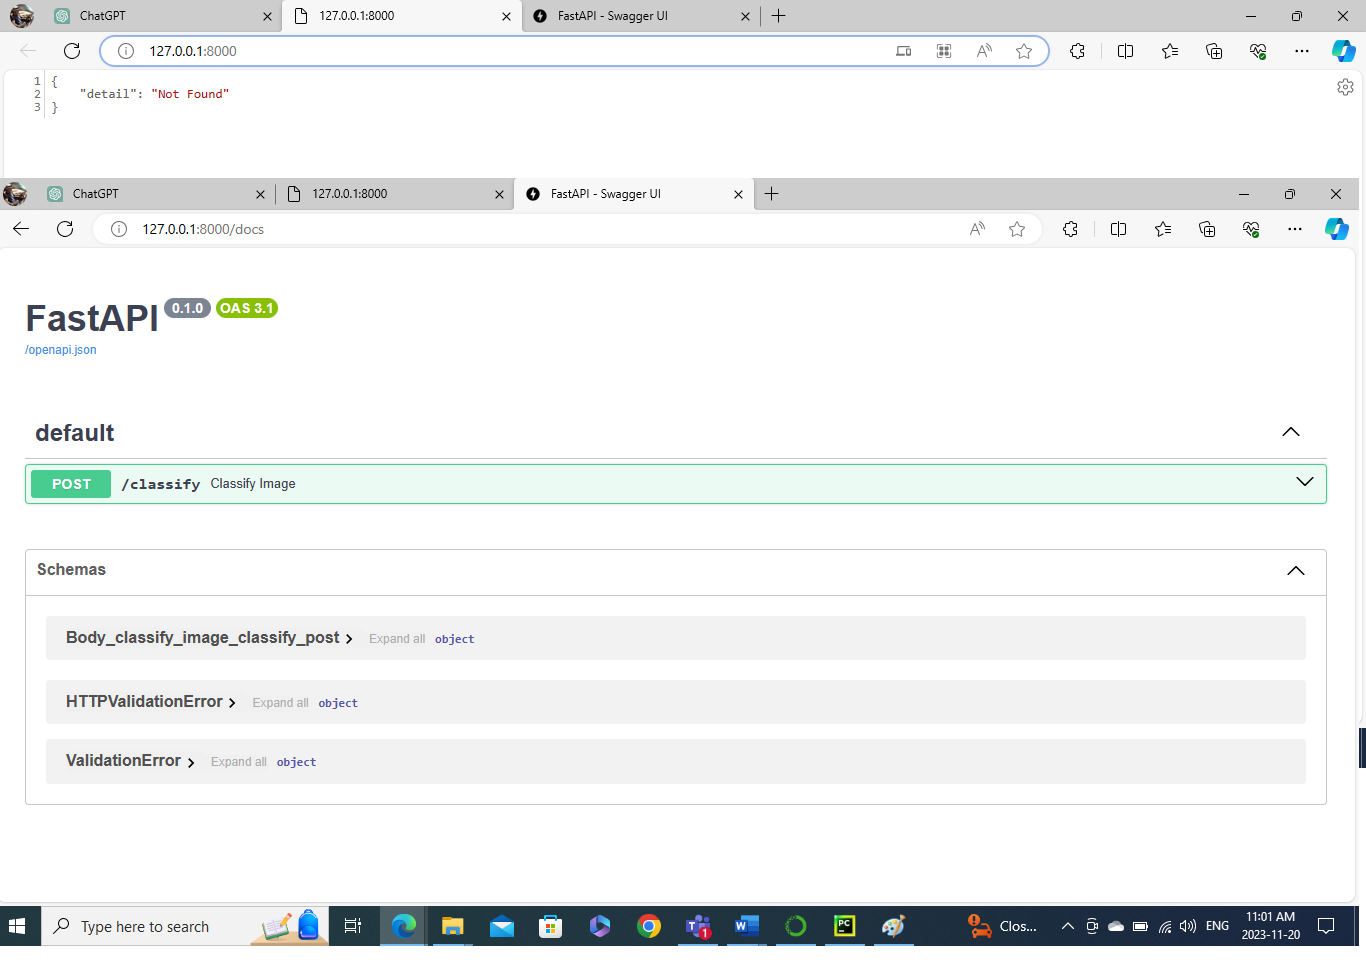

**Part 3: Streamlit Integration (Using PyCharm)**

Step 1: Install Streamlit

- Install Streamlit in your PyCharm environment.

Step 2: Create Streamlit App
- Create a new Python file for the Streamlit app.
- Design a user interface with a file uploader for images.
- On image upload, send the image to your FastAPI endpoint and display the result.

Step 3: Running the Streamlit App
- Run the Streamlit app locally to test.

Streamlit will create a user-friendly interface for your machine learning model. Here's how you can proceed with Part 3 of your project:

Step 1: Install Streamlit (skip this step already done.)

First, ensure that Streamlit is installed in your PyCharm environment. You can do this by running:


pip install streamlit


Step 2: Create Streamlit App

Creating a New Python File:

In your current project (GarbageClassificationAPI), create a new Python file for the Streamlit app. This file will be separate from your FastAPI code.

You can name this file something like streamlit_app.py. This name is just a suggestion; you can choose any name that makes sense to you.

Adding Code to the Streamlit App:

Copy the code you've provided into this new file (streamlit_app.py).

This code sets up a Streamlit interface with a file uploader. When an image is uploaded, it sends the image to your FastAPI endpoint and displays the classification result.

Step 3: Running the Streamlit App

Running Streamlit:

Open a terminal or command prompt.

Navigate to the directory of your project where streamlit_app.py is located.

Run the Streamlit app using the following command:

streamlit run streamlit_app.py

Streamlit will start a server and open your default web browser to show the app.

Using the App:

In the Streamlit app interface, you'll see the file uploader.

Upload an image, and the app will display the uploaded image and the classification result.

Important Notes

- Ensure Both Servers Are Running: For the Streamlit app to communicate with your FastAPI server, both need to be running simultaneously. So, make sure your FastAPI server is running (via the uvicorn main:app --reload command) when you use the Streamlit app.
- Handling Errors: If you encounter any issues, check the terminal for error messages. They can provide clues about what might be going wrong.
- Modifying API Endpoint: If your FastAPI server is running on a different port or address, make sure to update the api_endpoint variable in your Streamlit app accordingly.

In [ ]:
import streamlit as st
import requests
from PIL import Image
import io

# Streamlit page configuration
st.set_page_config(page_title="Garbage Classification", page_icon="🗑️")

st.title("Garbage Classification App")

# Endpoint of the FastAPI server (make sure to use the correct port)
api_endpoint = "http://127.0.0.1:8000/classify"

# File uploader
uploaded_file = st.file_uploader("Upload an image of garbage", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("Classifying...")

    # Prepare the file for sending
    img_bytes = io.BytesIO()
    image.save(img_bytes, format=image.format)
    img_bytes = img_bytes.getvalue()

    # Send the request to the API
    response = requests.post(api_endpoint, files={"file": img_bytes})
    if response.status_code == 200:
        classification = response.json()["classification"]
        st.write(f"Classification: {classification}")
    else:
        st.error("Error in classification")



Step 3: Running the Streamlit App

To run the Streamlit app, open the terminal in PyCharm and execute:


**streamlit run streamlit_app.py**

Streamlit will automatically open a new window in your default web browser, or you can navigate to the provided URL (usually http://localhost:8501).

note: in the terminal you have to close the local to run the streamlit.
close local is not any problem but you have to keep open API windows you have to close API local terminal for new running but you have to also keep open API pages.

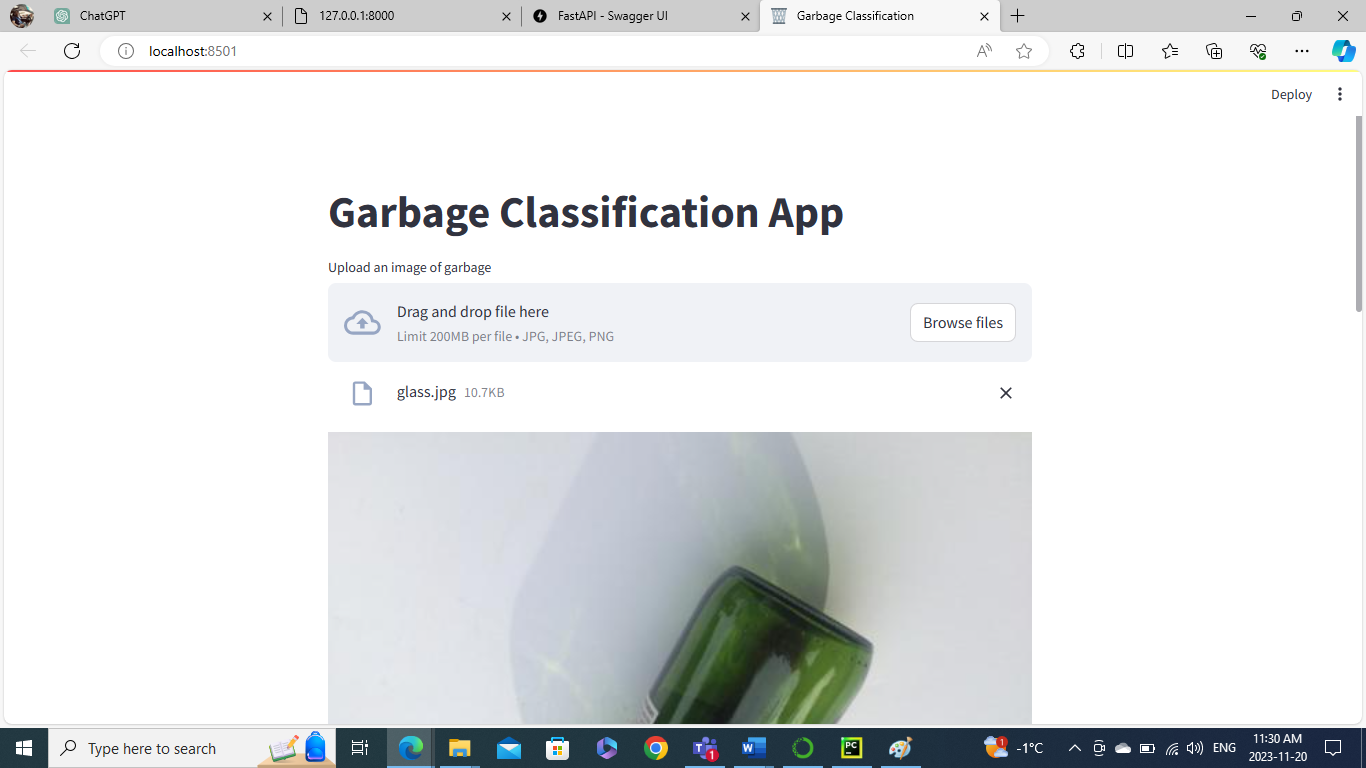

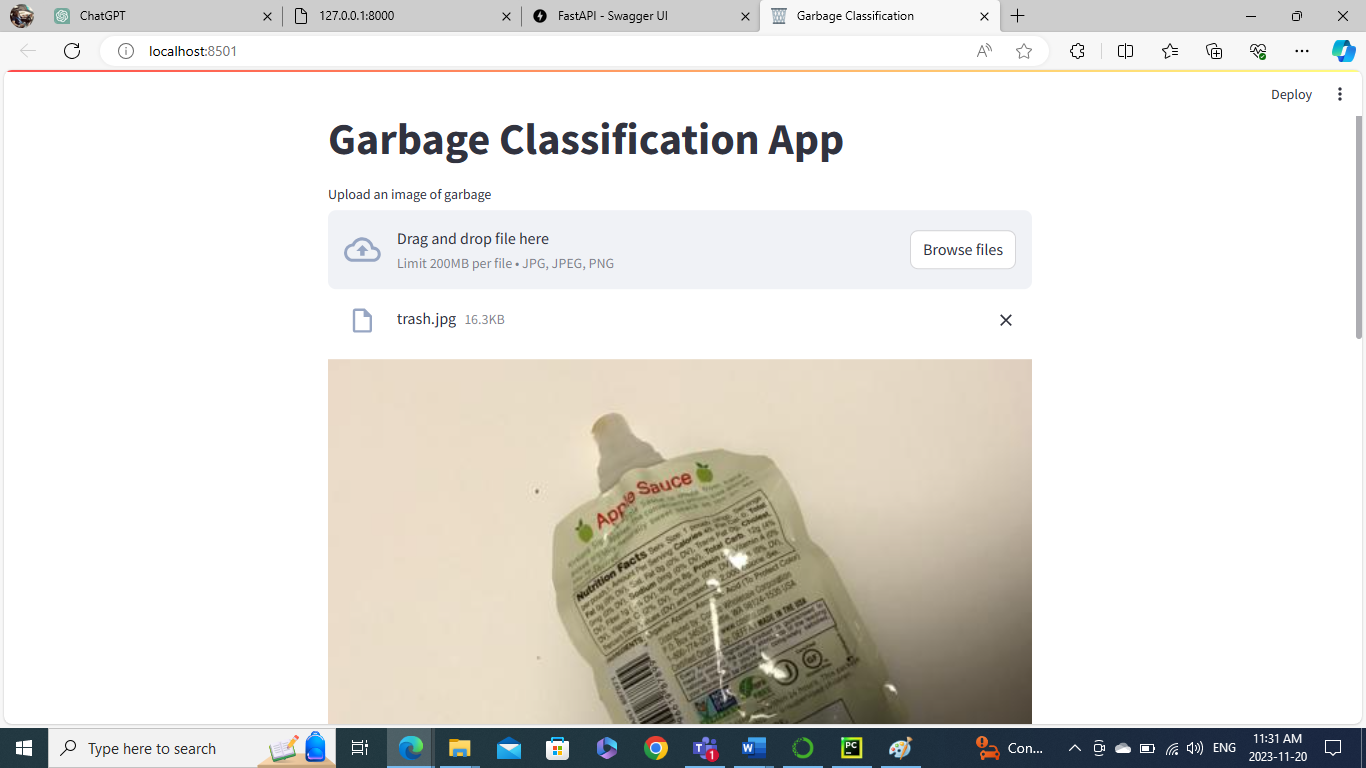

**Testing and Debugging**

- Test the entire pipeline by uploading images through Streamlit and ensuring the API returns correct predictions.

- Debug if necessary.



- Verify File Location: Ensure that streamlit_app.py is indeed in the directory C:\Users\HP\OneDrive\Desktop\GarbageClassificationAPI. You might have saved the file in a different location or under a different name. in this project at first i got error becouse my streamlit.py save in my model folder inside the GarbageClassificationAPI folder, so i move it directly in this addres: C:\Users\HP\OneDrive\Desktop\GarbageClassificationAPI and the error solved.